submitted by Hasbi Fathima VP,E22CSEU0750

##Task-1: Image Segmentation and Object Detection using Hough Transform



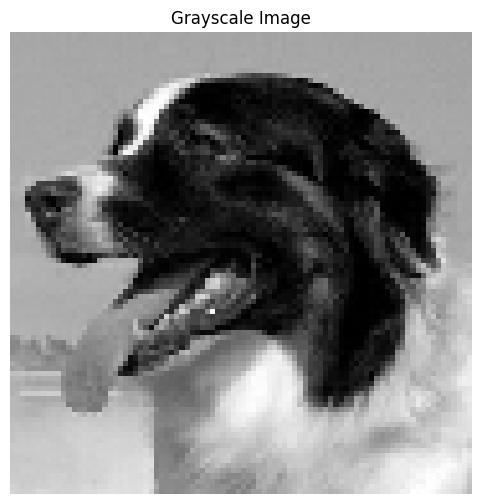

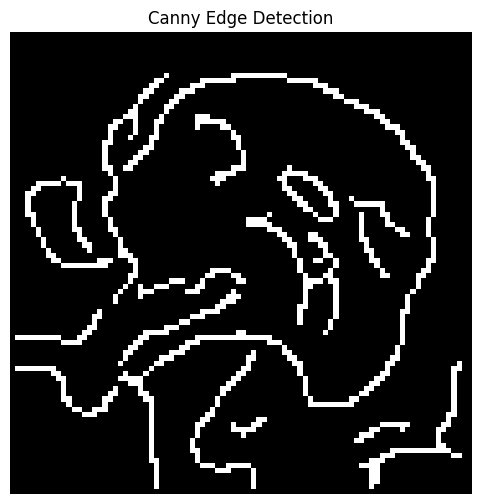

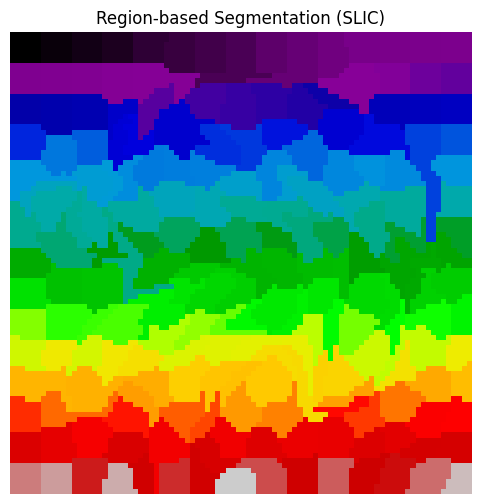

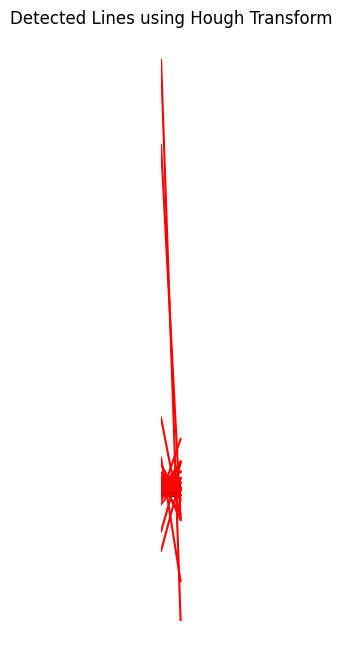

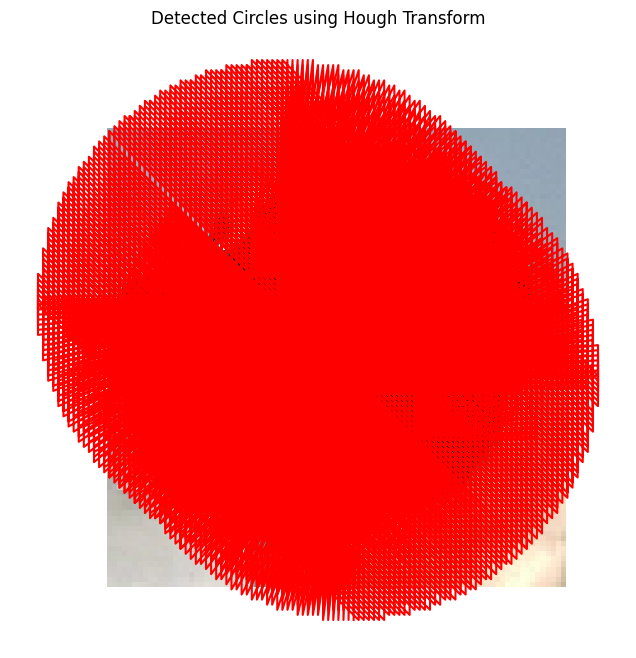

In [2]:
!pip install -q matplotlib opencv-python scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.segmentation import slic
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray

# Helper function to display images
def display_image(image, title="Image", cmap_type='gray'):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Task 1.1: Edge-based Segmentation using Canny Edge Detection ---
image_url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'
image = io.imread(image_url)
gray_image = rgb2gray(image)

# Canny Edge Detection
edges = canny(gray_image, sigma=2.0)
display_image(gray_image, title="Grayscale Image")
display_image(edges, title="Canny Edge Detection")

# --- Task 1.2: Region-based Segmentation ---
# Using SLIC (Simple Linear Iterative Clustering) for superpixel segmentation
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1, start_label=1)
display_image(segments_slic, title="Region-based Segmentation (SLIC)", cmap_type='nipy_spectral')

# --- Task 1.3: Hough Transform for Shape Detection ---
# 1. Detecting Lines using Hough Transform
h, theta, d = hough_line(edges)
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(edges, cmap='gray')
ax.set_title('Detected Lines using Hough Transform')
ax.axis('off')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = dist / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, image.shape[1]), (y0, y1), '-r')
plt.show()

# 2. Detecting Circles using Hough Transform
# Convert to grayscale and detect edges (if not already done)
image_gray = (gray_image * 255).astype(np.uint8)
edges = cv2.Canny(image_gray, 100, 200)

# Detect circles
hough_radii = np.arange(20, 50, 2)
hough_res = hough_circle(edges, hough_radii)

# Extracting peaks from the Hough accumulator
centers = []
radii = []
for radius, h_res in zip(hough_radii, hough_res):
    peaks = hough_circle_peaks([h_res], [radius], total_num_peaks=3)
    centers.extend(peaks[1])  # peaks[1] contains the centers
    radii.extend([radius] * len(peaks[1]))

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image, cmap='gray')
ax.set_title('Detected Circles using Hough Transform')
ax.axis('off')

for center_y, center_x, radius in zip(centers, centers, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    ax.plot(circx, circy, '-r')
plt.show()

#Task-2: Object Detection using Fashion MNIST and CIFAR-100 datasets


T2.1 YOLO (You Only Look Once)


image 1/1 /content/download.jpeg: 448x640 1 person, 1 bicycle, 6 cars, 2 trucks, 206.0ms
Speed: 4.5ms preprocess, 206.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


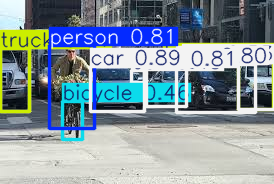

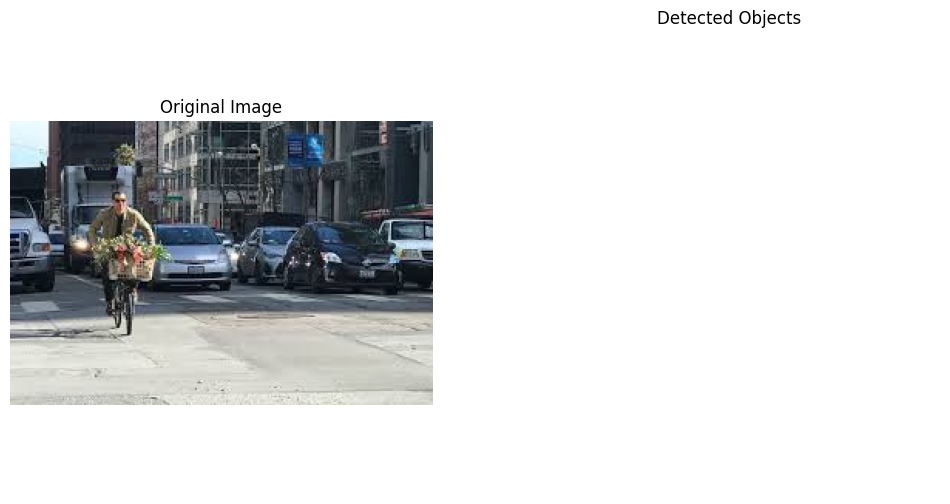

In [16]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Step 1: Install ultralytics if not installed
# !pip install ultralytics --quiet

# Step 2: Load the YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is a lightweight model for quick detection

# Step 3: Load a real-world image (provide your image path)
image_path = 'download.jpeg'  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert BGR (OpenCV format) to RGB for proper display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Perform object detection
results = model.predict(image_path)

# Plot the original and detected image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
results[0].show()
plt.title("Detected Objects")
plt.axis('off')
plt.show()


T2.2 Region based Convolution Neural Network (RCNN)

Epoch 1/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5578 - loss: 1.1916 - val_accuracy: 0.8320 - val_loss: 0.4309
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8205 - loss: 0.4981 - val_accuracy: 0.8340 - val_loss: 0.4051
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8372 - loss: 0.4346 - val_accuracy: 0.8900 - val_loss: 0.3121


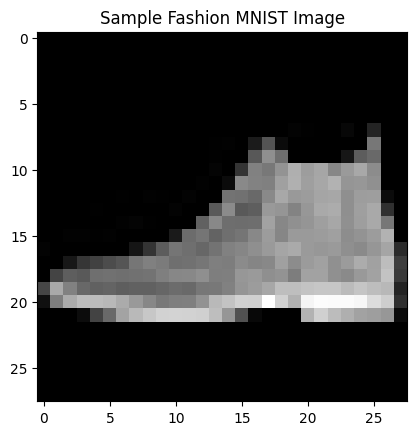

Fashion MNIST region-wise predictions: [5, 8, 7, 0]
Epoch 1/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.0165 - loss: 4.5723 - val_accuracy: 0.0500 - val_loss: 4.2530
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.0749 - loss: 4.0924 - val_accuracy: 0.0900 - val_loss: 4.0317
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.1492 - loss: 3.6103 - val_accuracy: 0.1380 - val_loss: 3.7801


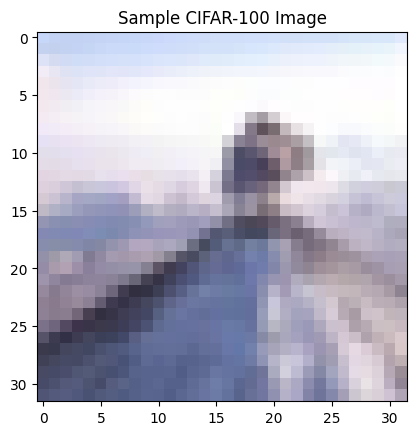

CIFAR-100 region-wise predictions: [69, 69, 95, 69]


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Load CIFAR-100 dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Normalize the datasets
fashion_train_images = fashion_train_images / 255.0
fashion_test_images = fashion_test_images / 255.0
cifar_train_images = cifar_train_images / 255.0
cifar_test_images = cifar_test_images / 255.0

def divide_image_into_regions(image, regions=(2, 2)):
    """Divide the image into specified regions."""
    h, w = image.shape[:2]
    h_step, w_step = h // regions[0], w // regions[1]
    return [image[i*h_step:(i+1)*h_step, j*w_step:(j+1)*w_step] for i in range(regions[0]) for j in range(regions[1])]

# CNN Model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),  # Adjusted to match flattened output
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Resize images to a fixed size before training
fashion_train_resized = tf.image.resize(fashion_train_images[..., np.newaxis], (28, 28))
fashion_test_resized = tf.image.resize(fashion_test_images[..., np.newaxis], (28, 28))

# Train Fashion MNIST model
fashion_model = create_cnn_model((28, 28, 1), 10)
fashion_model.fit(fashion_train_resized[:5000], fashion_train_labels[:5000], epochs=3, validation_split=0.1)

# Function to process and classify regions
def process_and_classify_regions(image, model, regions=(2, 2), target_size=(28, 28)):
    image_regions = divide_image_into_regions(image.squeeze(), regions)
    predictions = []
    for region in image_regions:
        region_resized = tf.image.resize(region[..., np.newaxis], target_size)
        region_input = np.expand_dims(region_resized, axis=0)
        pred = model.predict(region_input, verbose=0)
        predictions.append(np.argmax(pred))
    return predictions

# Test on a Fashion MNIST image
sample_image = fashion_test_images[0]
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Sample Fashion MNIST Image')
plt.show()
print("Fashion MNIST region-wise predictions:", process_and_classify_regions(sample_image, fashion_model))

# CIFAR-100 Processing
cifar_train_resized = tf.image.resize(cifar_train_images, (32, 32))
cifar_test_resized = tf.image.resize(cifar_test_images, (32, 32))

# Create and train CNN for CIFAR-100
cifar_model = create_cnn_model((32, 32, 3), 100)
cifar_model.fit(cifar_train_resized[:5000], cifar_train_labels[:5000], epochs=3, validation_split=0.1)

def process_and_classify_cifar_regions(image, model, regions=(2, 2), target_size=(32, 32)):
    image_regions = divide_image_into_regions(image, regions)
    predictions = []
    for region in image_regions:
        region_resized = tf.image.resize(region, target_size)
        region_input = np.expand_dims(region_resized, axis=0)
        pred = model.predict(region_input, verbose=0)
        predictions.append(np.argmax(pred))
    return predictions

# Test on a CIFAR-100 image
sample_cifar_image = cifar_test_images[0]
plt.imshow(sample_cifar_image)
plt.title('Sample CIFAR-100 Image')
plt.show()
print("CIFAR-100 region-wise predictions:", process_and_classify_cifar_regions(sample_cifar_image, cifar_model))
